In [18]:
%pylab inline
import seaborn as sbn
sbn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sbn.set_style( {'font.family':'sans-serif', 'font.sans-serif':'Helvetica'})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import netCDF4
import os.path

In [4]:
ncfile = netCDF4.Dataset('data.nc', 'r')
[nreplicates, niterations] = ncfile.variables['reduced_density'].shape
observation_interval = ncfile.variables['observation_interval'].getValue() # ps

# Select data to analyze.
A_it = np.array(ncfile.variables['reduced_density'][:,:], np.float64)

# Compute true expectation using mean of second half of all simulations.
t0 = int(niterations/2)
true_expectation = A_it[:,t0:].mean(1).mean(0)

#
# PLOT RELAXATION OF REDUCED DENSITIES
#

# Write initial reduced densities.
print ("Initial reduced densities:")
print (A_it[0,0])

x = np.arange(niterations) # tau
A_t = A_it.mean(0)
dA_t = A_it.std(0)


Initial reduced densities:
0.9599999785423279


In [6]:
nskip = 10 # number of samples to skip in uncertainty shading
nmax = 4000 # maximum samples to show

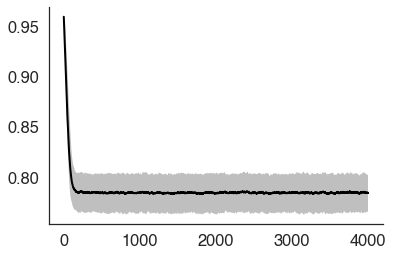

In [19]:
plt.fill_between(x[:nmax:nskip], A_t[:nmax:nskip]+2*dA_t[:nmax:nskip], A_t[:nmax:nskip]-2*dA_t[:nmax:nskip], facecolor='grey', edgecolor='grey', alpha=0.5, linewidth=0)
plt.plot(x[:nmax], A_t[:nmax], 'k-')
sbn.despine()

In [8]:
Nequil = 100
Acumavg_it = np.zeros([nreplicates, niterations], np.float64)
Aburnin_it = np.zeros([nreplicates, niterations], np.float64)
for i in range(nreplicates):
    for t in range(niterations):
        Acumavg_it[i,t] = A_it[i,0:(t+1)].mean()

        Ninit = Nequil
        if t < Nequil:
            Ninit = 0
        Aburnin_it[i,t] = A_it[i,Ninit:(t+1)].mean()

# Compute reverse cumulative average.
Arevcum_it = np.zeros([nreplicates, niterations], np.float64)
for i in range(nreplicates):
    for t0 in range(niterations):
        Arevcum_it[i,t0] = A_it[i,t0:].mean()

Acumavg_mean_t = Acumavg_it.mean(0)
Aburnin_mean_t = Aburnin_it.mean(0)
Arevcum_mean_t = Arevcum_it.mean(0)

Acumavg_std_t = Acumavg_it.std(0)
Aburnin_std_t = Aburnin_it.std(0)
Arevcum_std_t = Arevcum_it.std(0)



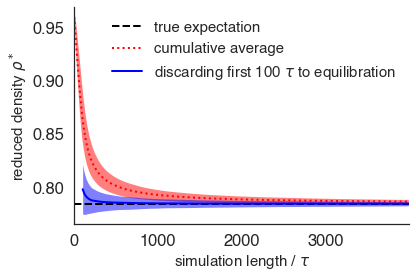

In [16]:
fontsize = 15
pylab.fill_between(x[:nmax:nskip], Acumavg_mean_t[:nmax:nskip]+2*Acumavg_std_t[:nmax:nskip], Acumavg_mean_t[:nmax:nskip]-2*Acumavg_std_t[:nmax:nskip], facecolor='red', edgecolor='red', alpha=0.5, linewidth=0)
pylab.fill_between(x[Nequil:nmax:nskip], Aburnin_mean_t[Nequil:nmax:nskip]+2*Aburnin_std_t[Nequil:nmax:nskip], Aburnin_mean_t[Nequil:nmax:nskip]-2*Aburnin_std_t[Nequil:nmax:nskip], facecolor='blue', edgecolor='blue', alpha=0.5, linewidth=0)

pylab.plot([x[0], x[nmax]], [true_expectation, true_expectation], 'k--') # true expectation (from all data)
pylab.plot(x[:nmax], Acumavg_mean_t[:nmax], 'r:') # cumulative average from beginning
pylab.plot(x[Nequil:nmax], Aburnin_mean_t[Nequil:nmax], 'b-') # cumulative average after discarding some initial data to equilibrium

pylab.legend(['true expectation', 'cumulative average', r'discarding first %d $\tau$ to equilibration' % Nequil], fontsize=fontsize, frameon=False)

pylab.xlabel(r'simulation length / $\tau$', fontsize=15)
pylab.ylabel(r'reduced density $\rho^*$', fontsize=15)

# Adjust axes.
oldaxis = pylab.axis()
pylab.axis([0, x[:nmax].max(), oldaxis[2], oldaxis[3]])

sbn.despine()



In [ ]:
## figure 5 instead

In [21]:
ncfile = netCDF4.Dataset('data.nc', 'r')
[nreplicates, niterations] = ncfile.variables['reduced_potential'].shape
observation_interval = ncfile.variables['observation_interval'].getValue() # ps

In [23]:
# Select data to analyze.
A_it = np.array(ncfile.variables['reduced_potential'][:,:], np.float64)

# Compute true expectation using mean of second half of all simulations.
t0 = int(niterations/2)
true_expectation = A_it[:,t0:].mean(1).mean(0)

#
# PLOT RELAXATION OF REDUCED DENSITIES
#



x = np.arange(niterations) # tau
A_t = A_it.mean(0)
dA_t = A_it.std(0)

[]

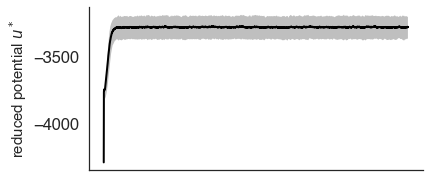

In [33]:
figsize(6,3)
fig, ax = plt.subplots()
pylab.fill_between(x[:nmax:nskip], A_t[:nmax:nskip]+2*dA_t[:nmax:nskip], A_t[:nmax:nskip]-2*dA_t[:nmax:nskip], facecolor='grey', edgecolor='grey', alpha=0.5, linewidth=0)
pylab.plot(x[:nmax], A_t[:nmax], 'k-')

pylab.ylabel(r'reduced potential $u^*$', fontsize=fontsize)
sbn.despine()
ax.set_xticks([])

In [26]:
Nequil = 100
Acumavg_it = np.zeros([nreplicates, niterations], np.float64)
Aburnin_it = np.zeros([nreplicates, niterations], np.float64)
for i in range(nreplicates):
    for t in range(niterations):
        Acumavg_it[i,t] = A_it[i,0:(t+1)].mean()

        Ninit = Nequil
        if t < Nequil:
            Ninit = 0
        Aburnin_it[i,t] = A_it[i,Ninit:(t+1)].mean()

# Compute reverse cumulative average.
Arevcum_it = np.zeros([nreplicates, niterations], np.float64)
for i in range(nreplicates):
    for t0 in range(niterations):
        Arevcum_it[i,t0] = A_it[i,t0:].mean()

Acumavg_mean_t = Acumavg_it.mean(0)
Aburnin_mean_t = Aburnin_it.mean(0)
Arevcum_mean_t = Arevcum_it.mean(0)

Acumavg_std_t = Acumavg_it.std(0)
Aburnin_std_t = Aburnin_it.std(0)
Arevcum_std_t = Arevcum_it.std(0)

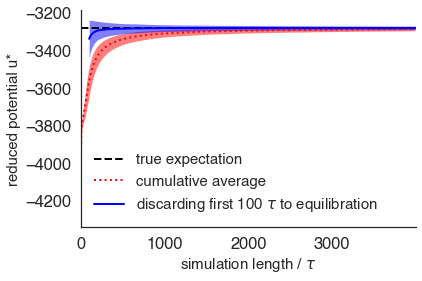

In [30]:

fontsize = 15
pylab.fill_between(x[:nmax:nskip], Acumavg_mean_t[:nmax:nskip]+2*Acumavg_std_t[:nmax:nskip], Acumavg_mean_t[:nmax:nskip]-2*Acumavg_std_t[:nmax:nskip], facecolor='red', edgecolor='red', alpha=0.5, linewidth=0)
pylab.fill_between(x[Nequil:nmax:nskip], Aburnin_mean_t[Nequil:nmax:nskip]+2*Aburnin_std_t[Nequil:nmax:nskip], Aburnin_mean_t[Nequil:nmax:nskip]-2*Aburnin_std_t[Nequil:nmax:nskip], facecolor='blue', edgecolor='blue', alpha=0.5, linewidth=0)

pylab.plot([x[0], x[nmax]], [true_expectation, true_expectation], 'k--') # true expectation (from all data)
pylab.plot(x[:nmax], Acumavg_mean_t[:nmax], 'r:') # cumulative average from beginning
pylab.plot(x[Nequil:nmax], Aburnin_mean_t[Nequil:nmax], 'b-') # cumulative average after discarding some initial data to equilibrium

pylab.legend(['true expectation', 'cumulative average', r'discarding first %d $\tau$ to equilibration' % Nequil], fontsize=fontsize, frameon=False)

pylab.xlabel(r'simulation length / $\tau$', fontsize=15)
pylab.ylabel(r'reduced potential u*', fontsize=15)

# Adjust axes.
oldaxis = pylab.axis()
pylab.axis([0, x[:nmax].max(), oldaxis[2], oldaxis[3]])

sbn.despine()